In [18]:
import pandas as pd
import quandl
from sklearn.metrics import mean_squared_error

#### Importing Data

In [20]:
cb_iy = quandl.get("ML/USEY", authtoken="aG9j5L1aZEe7Gti-5m1D")
tyc_r = quandl.get("USTREASURY/YIELD", authtoken="aG9j5L1aZEe7Gti-5m1D")

In [21]:
cb_iy

,BAMLC0A0CMEY
DATE,
1996-12-31,7.09
1997-01-02,7.10
1997-01-03,7.09
1997-01-06,7.11
1997-01-07,7.13
...,...
2020-06-30,2.22
2020-07-01,2.21
2020-07-02,2.17


In [22]:
tyc_r

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,0.13,0.14,0.16,0.18,0.16,0.16,0.18,0.29,0.49,0.66,1.18,1.41
2020-07-01,0.12,0.12,0.14,0.17,0.16,0.17,0.19,0.31,0.52,0.69,1.20,1.43
2020-07-02,0.13,0.14,0.14,0.16,0.16,0.16,0.19,0.29,0.50,0.68,1.20,1.43


#### Formatting DF for Results Comparison

In [24]:
corp_df = cb_iy["2020-04-21":]
corp_df

,BAMLC0A0CMEY
DATE,
2020-04-21,2.96
2020-04-22,2.98
2020-04-23,2.95
2020-04-24,2.93
2020-04-27,2.97
2020-04-28,2.92
2020-04-29,2.90
2020-04-30,2.78
2020-05-01,2.80


In [25]:
tyc_10 = tyc_r[['10 YR']]
tyc_10

,10 YR
Date,
1990-01-02,7.94
1990-01-03,7.99
1990-01-04,7.98
1990-01-05,7.99
1990-01-08,8.02
...,...
2020-06-30,0.66
2020-07-01,0.69
2020-07-02,0.68


In [26]:
tyc_10 = tyc_10["2020-04-21": "2020-07-06"]
tyc_10

,10 YR
Date,
2020-04-21,0.58
2020-04-22,0.63
2020-04-23,0.61
2020-04-24,0.60
2020-04-27,0.67
2020-04-28,0.62
2020-04-29,0.63
2020-04-30,0.64
2020-05-01,0.64


In [36]:
len(tyc_10)

53

In [37]:
len(corp_df)

56

In [38]:
corp_df.index.names = ['Date']
tyc_10.index.names = ['Date']

In [39]:
df = tyc_10.merge(corp_df, right_index=True, left_index=True)

In [41]:
df

,10 YR,BAMLC0A0CMEY
Date,,
2020-04-21,0.58,2.96
2020-04-22,0.63,2.98
2020-04-23,0.61,2.95
2020-04-24,0.60,2.93
2020-04-27,0.67,2.97
2020-04-28,0.62,2.92
2020-04-29,0.63,2.90
2020-04-30,0.64,2.78
2020-05-01,0.64,2.80


In [42]:
df.isna().sum()

10 YR           0
BAMLC0A0CMEY    0
dtype: int64

In [43]:
len(df)

53

In [44]:
df['Spread'] = df['BAMLC0A0CMEY'] - df['10 YR']

In [45]:
df['Spread']

Date
2020-04-21    2.38
2020-04-22    2.35
2020-04-23    2.34
2020-04-24    2.33
2020-04-27    2.30
2020-04-28    2.30
2020-04-29    2.27
2020-04-30    2.14
2020-05-01    2.16
2020-05-04    2.17
2020-05-05    2.15
2020-05-06    2.12
2020-05-07    2.16
2020-05-08    2.15
2020-05-11    2.16
2020-05-12    2.15
2020-05-13    2.16
2020-05-14    2.15
2020-05-15    2.14
2020-05-18    2.05
2020-05-19    2.01
2020-05-20    1.95
2020-05-21    1.92
2020-05-22    1.92
2020-05-26    1.87
2020-05-27    1.85
2020-05-28    1.82
2020-05-29    1.81
2020-06-01    1.82
2020-06-02    1.77
2020-06-03    1.67
2020-06-04    1.62
2020-06-05    1.49
2020-06-08    1.47
2020-06-09    1.49
2020-06-10    1.54
2020-06-11    1.65
2020-06-12    1.63
2020-06-15    1.64
2020-06-16    1.52
2020-06-17    1.51
2020-06-18    1.52
2020-06-19    1.52
2020-06-22    1.52
2020-06-23    1.50
2020-06-24    1.54
2020-06-25    1.56
2020-06-26    1.58
2020-06-29    1.58
2020-06-30    1.56
2020-07-01    1.52
2020-07-02    1.49
2020-07

In [46]:
df.isna().sum()

10 YR           0
BAMLC0A0CMEY    0
Spread          0
dtype: int64

In [49]:
df = df[['Spread']]
df

,Spread
Date,
2020-04-21,2.38
2020-04-22,2.35
2020-04-23,2.34
2020-04-24,2.33
2020-04-27,2.30
2020-04-28,2.30
2020-04-29,2.27
2020-04-30,2.14
2020-05-01,2.16


#### Importing ARIMA Results Data

In [239]:
# forecast_5 = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/5_days.csv')
# forecast_30 = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/30_days.csv')
# forecast_60 = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/60_days.csv')
# forecast_90 = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/90_days.csv')
# forecast_120 = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/120_days.csv')

In [105]:
forecast_5

,Unnamed: 0,0
0,5821,2.317045
1,5822,2.314787
2,5823,2.313060
3,5824,2.311739
4,5825,2.310730


In [106]:
forecast_120

,Unnamed: 0,0
0,5821,2.317045
1,5822,2.314787
2,5823,2.313060
3,5824,2.311739
4,5825,2.310730
...,...,...
115,5936,2.307452
116,5937,2.307452
117,5938,2.307452
118,5939,2.307452


#### Formatting Results DFs

In [107]:
forecast_5 = forecast_5.drop(columns='Unnamed: 0')
forecast_5['Spread'] = forecast_5['0']
forecast_5 = forecast_5.drop(columns='0')
forecast_5

,Spread
0,2.317045
1,2.314787
2,2.313060
3,2.311739
4,2.310730


In [108]:
forecast_30 = forecast_30.drop(columns='Unnamed: 0')
forecast_30['Spread'] = forecast_30['0']
forecast_30 = forecast_30.drop(columns='0')
forecast_30

,Spread
0,2.317045
1,2.314787
2,2.313060
3,2.311739
4,2.310730
5,2.309958
6,2.309368
7,2.308917
8,2.308572
9,2.308308


In [109]:
forecast_60 = forecast_60.drop(columns='Unnamed: 0')
forecast_60['Spread'] = forecast_60['0']
forecast_60 = forecast_60.drop(columns='0')
forecast_60

,Spread
0,2.317045
1,2.314787
2,2.313060
3,2.311739
4,2.310730
5,2.309958
6,2.309368
7,2.308917
8,2.308572
9,2.308308


In [110]:
forecast_90 = forecast_90.drop(columns='Unnamed: 0')
forecast_90['Spread'] = forecast_90['0']
forecast_90 = forecast_90.drop(columns='0')

In [112]:
forecast_90

,Spread
0,2.317045
1,2.314787
2,2.313060
3,2.311739
4,2.310730
...,...
85,2.307452
86,2.307452
87,2.307452
88,2.307452


In [113]:
forecast_120 = forecast_120.drop(columns='Unnamed: 0')
forecast_120['Spread'] = forecast_120['0']
forecast_120 = forecast_120.drop(columns='0')
forecast_120

,Spread
0,2.317045
1,2.314787
2,2.313060
3,2.311739
4,2.310730
...,...
115,2.307452
116,2.307452
117,2.307452
118,2.307452


#### Finding the MSE for each set of Results

In [132]:
y_truth = df[:5]
y_forecasted = forecast_5
mean_squared_error(y_truth , y_forecasted)

0.0012755254619349898

In [133]:
y_truth = df[:30]
y_forecasted = forecast_30
mean_squared_error(y_truth , y_forecasted)

0.07670814185914969

In [134]:
# have to match the end dates
y_truth = df[:53]
y_forecasted = forecast_60[:53]
mean_squared_error(y_truth , y_forecasted)

0.2959073434367839

##### These dates extend too far out

In [135]:
# # wont work
# y_truth = df[:90]
# y_forecasted = forecast_90
# mean_squared_error(y_truth , y_forecasted)

In [136]:
# # wont work
# y_truth = df[:120]
# y_forecasted = forecast_120
# mean_squared_error(y_truth , y_forecasted)

#### Adding Dates to each Forecast DF

In [226]:
idx_5 = pd.date_range('2020-04-21', '2020-04-25')
idx_5

DatetimeIndex(['2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25'],
              dtype='datetime64[ns]', freq='D')

In [235]:
idx_30 = pd.date_range('2020-04-21', '2020-05-20')
idx_30

DatetimeIndex(['2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns]', freq='D')

In [236]:
idx_53 = pd.date_range('2020-04-21', '2020-06-12')
idx_53

DatetimeIndex(['2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
               '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
               '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
               '2020-06-12'],
              dtype='datetime64[ns]', freq='D')

In [232]:
forecast_5['Date'] = idx_5
forecast_5['Spread'] = forecast_5['0']
forecast_5 = forecast_5.set_index('Date')
forecast_5 = forecast_5.drop(columns='Unnamed: 0')
forecast_5 = forecast_5.drop(columns='0')

In [233]:
forecast_5

,Spread
Date,
2020-04-21,2.317045
2020-04-22,2.314787
2020-04-23,2.313060
2020-04-24,2.311739
2020-04-25,2.310730


In [240]:
forecast_30['Date'] = idx_30
forecast_30['Spread'] = forecast_30['0']
forecast_30 = forecast_30.set_index('Date')
forecast_30 = forecast_30.drop(columns='Unnamed: 0')
forecast_30 = forecast_30.drop(columns='0')

In [241]:
forecast_30

,Spread
Date,
2020-04-21,2.317045
2020-04-22,2.314787
2020-04-23,2.313060
2020-04-24,2.311739
2020-04-25,2.310730
2020-04-26,2.309958
2020-04-27,2.309368
2020-04-28,2.308917
2020-04-29,2.308572


In [243]:
forecast_60 = forecast_60[:53]
forecast_60['Date'] = idx_53
forecast_60['Spread'] = forecast_60['0']
forecast_60 = forecast_60.set_index('Date')
forecast_60 = forecast_60.drop(columns='Unnamed: 0')
forecast_60 = forecast_60.drop(columns='0')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [245]:
forecast_60

,Spread
Date,
2020-04-21,2.317045
2020-04-22,2.314787
2020-04-23,2.313060
2020-04-24,2.311739
2020-04-25,2.310730
2020-04-26,2.309958
2020-04-27,2.309368
2020-04-28,2.308917
2020-04-29,2.308572


#### Plotting Each Forecast

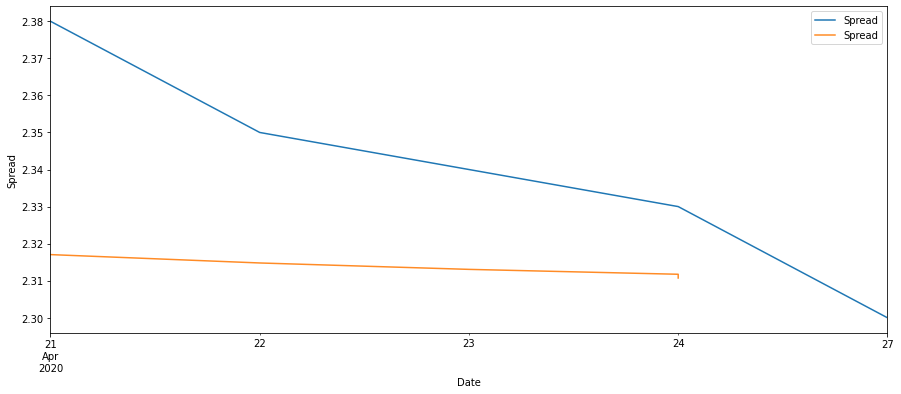

In [264]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df[:5].plot(label='observed')

# Plot predicted values
forecast_5.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Spread')
plt.legend()

plt.show()

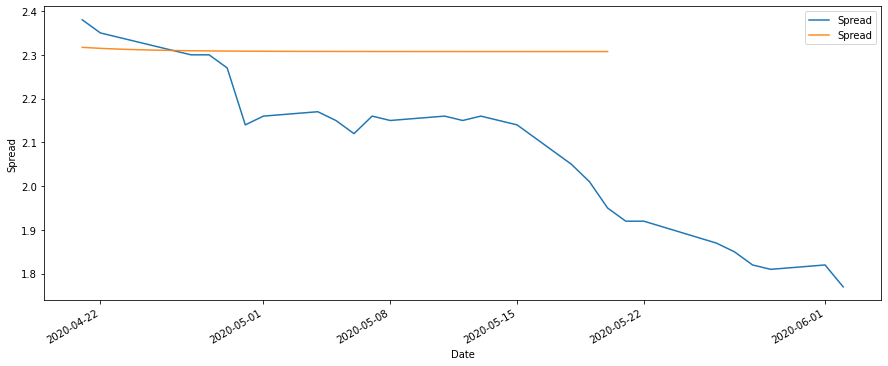

In [265]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df[:30].plot(label='observed')

# Plot predicted values
forecast_30.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Spread')
plt.legend()

plt.show()

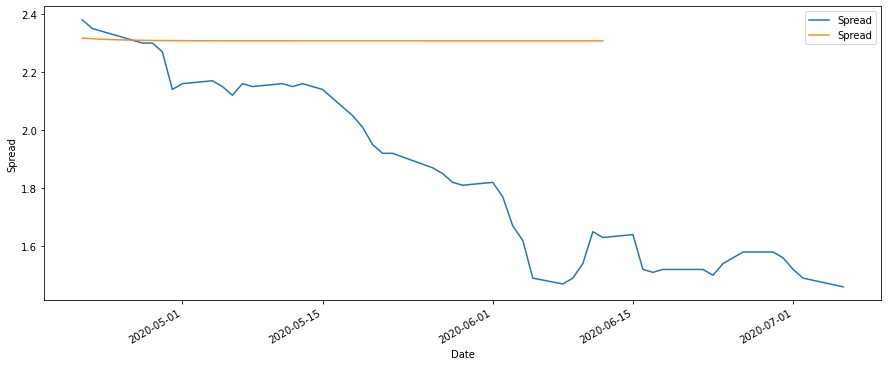

In [267]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df[:53].plot(label='observed')

# Plot predicted values
forecast_60.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Spread')
plt.legend()

plt.show()

#### Doing the same thing for FBP

In [126]:
fbp_results = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/fbprophet_results.csv')

In [128]:
fbp_results

,Unnamed: 0,yhat
0,5821,1.253956
1,5822,1.248886
2,5823,1.240850
3,5824,1.239736
4,5825,1.315996
...,...,...
115,5936,1.239703
116,5937,1.325068
117,5938,1.328998
118,5939,1.247696


In [129]:
fbp_results.drop(columns='Unnamed: 0')
fbp_results['Spread'] = fbp_results['yhat']
fbp_results = fbp_results.drop(columns='yhat')

In [131]:
fbp_results = fbp_results.drop(columns='Unnamed: 0')
fbp_results

,Spread
0,1.253956
1,1.248886
2,1.240850
3,1.239736
4,1.315996
...,...
115,1.239703
116,1.325068
117,1.328998
118,1.247696


In [137]:
# have to match the end dates
y_truth = df[:5]
y_forecasted = fbp_results[:5]
mean_squared_error(y_truth , y_forecasted)

1.16909967153889

In [138]:
# have to match the end dates
y_truth = df[:30]
y_forecasted = fbp_results[:30]
mean_squared_error(y_truth , y_forecasted)

0.7610151684338569

In [140]:
# have to match the end dates
y_truth = df[:53]
y_forecasted = fbp_results[:53]
mean_squared_error(y_truth , y_forecasted)

0.47257542845599454

In [ ]:
#once finalized, need to run end to end notebook